In [4]:
%matplotlib inline

import pandas as pd
import os
import glob
import matplotlib.pyplot as plt

DATA_PATH = '/Users/vupham/data/quandl/yahoo/data_nasdaq_indices'

In [5]:
files = sorted(glob.glob(DATA_PATH + '/*.csv'))
all_data = None
for p in files:
    # print p
    stock_name = os.path.splitext(os.path.split(p)[1])[0]
    
    df = pd.read_csv(p)[['Date', 'Close']].rename(columns={'Close': 'Close_' + stock_name})
    if all_data is None:
        all_data = df
    else:
        all_data = all_data.merge(df, how='outer', on='Date')

In [6]:
all_data = all_data.sort_values(by='Date').set_index('Date')
all_data.iloc[:10, :]

,Close_YAHOO_HK_CSCS500,Close_YAHOO_HK_CSHK100,Close_YAHOO_HK_HKL,Close_YAHOO_INDEX_AEX,Close_YAHOO_INDEX_AORD,Close_YAHOO_INDEX_ATX,Close_YAHOO_INDEX_AXJO,Close_YAHOO_INDEX_AXPJ,Close_YAHOO_INDEX_BFX,Close_YAHOO_INDEX_BSESN,...,Close_YAHOO_INDEX_WILRESI,Close_YAHOO_INDEX_XAL,Close_YAHOO_INDEX_XAU,Close_YAHOO_INDEX_XAX,Close_YAHOO_INDEX_XBD,Close_YAHOO_INDEX_XCI,Close_YAHOO_INDEX_XII,Close_YAHOO_INDEX_XMI,Close_YAHOO_INDEX_XNG,Close_YAHOO_INDEX_XOI
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-02,NaN,NaN,33450.98,509.769989,6434.100098,4509.240234,6353.200195,NaN,4114.459961,20465.300781,...,NaN,32.630001,184.330002,2405.030029,202.089996,937.289978,696.419983,1346.069946,580.799988,1562.140015
2008-01-03,NaN,NaN,32659.07,508.670013,6372.600098,4466.470215,6290.700195,NaN,4117.490234,20345.199219,...,NaN,31.930000,190.350006,2419.040039,200.330002,936.229980,697.869995,1347.770020,585.809998,1565.939941
2008-01-04,NaN,NaN,33494.18,500.600006,6385.399902,4358.850098,6306.799805,NaN,4094.379883,20686.890625,...,NaN,31.400000,186.229996,2382.459961,192.539993,893.030029,680.830017,1324.750000,571.820007,1525.449951
2008-01-07,NaN,NaN,33107.75,500.630005,6240.399902,4332.350098,6161.600098,NaN,4097.279785,20812.650391,...,NaN,31.709999,182.639999,2382.070068,190.619995,888.260010,682.820007,1330.719971,570.960022,1519.979980
2008-01-08,NaN,NaN,33025.67,497.230011,6205.700195,4373.859863,6128.100098,NaN,4097.169922,20873.330078,...,NaN,29.170000,188.600006,2365.959961,181.679993,861.609985,671.119995,1318.209961,565.229980,1495.780029
2008-01-09,NaN,NaN,33684.66,491.739990,6159.500000,4282.359863,6087.700195,NaN,4065.320068,20869.779297,...,NaN,29.219999,189.699997,2383.800049,184.210007,882.330017,681.719971,1334.329956,579.210022,1505.959961
2008-01-10,NaN,NaN,33146.27,484.100006,6147.299805,4162.180176,6078.700195,NaN,4051.530029,20582.080078,...,NaN,32.730000,192.809998,2416.449951,190.929993,883.619995,686.099976,1340.650024,578.309998,1492.469971
2008-01-11,NaN,NaN,32679.13,481.829987,6054.399902,4118.580078,5981.600098,NaN,4022.929932,20827.449219,...,NaN,31.530001,193.550003,2362.199951,191.479996,867.500000,676.570007,1312.160034,575.080017,1463.800049


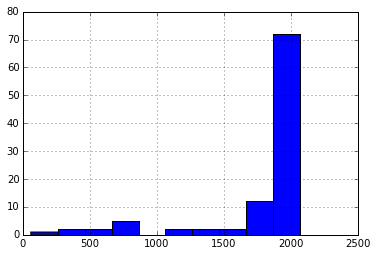

In [7]:
all_data.count().hist()

In [8]:
print len(all_data), len(all_data.columns), sum(all_data.count() >= 2000)
counts = all_data.count()
filtered_data = all_data.loc[:, counts.index[counts >= 2000].tolist()].sort_index()
print len(filtered_data), len(filtered_data.columns)
filtered_data.iloc[:10, :]

2088 100 60
2088 60


,Close_YAHOO_INDEX_AEX,Close_YAHOO_INDEX_AORD,Close_YAHOO_INDEX_ATX,Close_YAHOO_INDEX_AXJO,Close_YAHOO_INDEX_BFX,Close_YAHOO_INDEX_BTK,Close_YAHOO_INDEX_DRG,Close_YAHOO_INDEX_EPX,Close_YAHOO_INDEX_FCHI,Close_YAHOO_INDEX_FVX,...,Close_YAHOO_INDEX_VIX,Close_YAHOO_INDEX_XAL,Close_YAHOO_INDEX_XAU,Close_YAHOO_INDEX_XAX,Close_YAHOO_INDEX_XBD,Close_YAHOO_INDEX_XCI,Close_YAHOO_INDEX_XII,Close_YAHOO_INDEX_XMI,Close_YAHOO_INDEX_XNG,Close_YAHOO_INDEX_XOI
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-02,509.769989,6434.100098,4509.240234,6353.200195,4114.459961,787.929993,336.700012,436.459991,5550.359863,3.271,...,23.170000,32.630001,184.330002,2405.030029,202.089996,937.289978,696.419983,1346.069946,580.799988,1562.140015
2008-01-03,508.670013,6372.600098,4466.470215,6290.700195,4117.490234,779.349976,338.029999,440.609985,5546.080078,3.264,...,22.490000,31.930000,190.350006,2419.040039,200.330002,936.229980,697.869995,1347.770020,585.809998,1565.939941
2008-01-04,500.600006,6385.399902,4358.850098,6306.799805,4094.379883,773.609985,334.329987,427.640015,5446.790039,3.169,...,23.940001,31.400000,186.229996,2382.459961,192.539993,893.030029,680.830017,1324.750000,571.820007,1525.449951
2008-01-07,500.630005,6240.399902,4332.350098,6161.600098,4097.279785,789.890015,342.950012,425.950012,5452.830078,3.157,...,23.790001,31.709999,182.639999,2382.070068,190.619995,888.260010,682.820007,1330.719971,570.960022,1519.979980
2008-01-08,497.230011,6205.700195,4373.859863,6128.100098,4097.169922,784.669983,349.899994,419.179993,5495.669922,3.157,...,25.430000,29.170000,188.600006,2365.959961,181.679993,861.609985,671.119995,1318.209961,565.229980,1495.780029
2008-01-09,491.739990,6159.500000,4282.359863,6087.700195,4065.320068,793.809998,355.660004,428.070007,5435.419922,3.089,...,24.120001,29.219999,189.699997,2383.800049,184.210007,882.330017,681.719971,1334.329956,579.210022,1505.959961
2008-01-10,484.100006,6147.299805,4162.180176,6078.700195,4051.530029,807.270020,354.670013,428.239990,5400.430176,3.158,...,23.450001,32.730000,192.809998,2416.449951,190.929993,883.619995,686.099976,1340.650024,578.309998,1492.469971
2008-01-11,481.829987,6054.399902,4118.580078,5981.600098,4022.929932,807.830017,354.420013,426.220001,5371.410156,3.071,...,23.680000,31.530001,193.550003,2362.199951,191.479996,867.500000,676.570007,1312.160034,575.080017,1463.800049


In [9]:
filled_data = filtered_data.fillna(axis=0, method='ffill').fillna(axis=0, method='bfill')
filled_data.iloc[:10, :]

,Close_YAHOO_INDEX_AEX,Close_YAHOO_INDEX_AORD,Close_YAHOO_INDEX_ATX,Close_YAHOO_INDEX_AXJO,Close_YAHOO_INDEX_BFX,Close_YAHOO_INDEX_BTK,Close_YAHOO_INDEX_DRG,Close_YAHOO_INDEX_EPX,Close_YAHOO_INDEX_FCHI,Close_YAHOO_INDEX_FVX,...,Close_YAHOO_INDEX_VIX,Close_YAHOO_INDEX_XAL,Close_YAHOO_INDEX_XAU,Close_YAHOO_INDEX_XAX,Close_YAHOO_INDEX_XBD,Close_YAHOO_INDEX_XCI,Close_YAHOO_INDEX_XII,Close_YAHOO_INDEX_XMI,Close_YAHOO_INDEX_XNG,Close_YAHOO_INDEX_XOI
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-01,509.769989,6434.100098,4509.240234,6353.200195,4114.459961,787.929993,336.700012,436.459991,5550.359863,3.271,...,23.170000,32.630001,184.330002,2405.030029,202.089996,937.289978,696.419983,1346.069946,580.799988,1562.140015
2008-01-02,509.769989,6434.100098,4509.240234,6353.200195,4114.459961,787.929993,336.700012,436.459991,5550.359863,3.271,...,23.170000,32.630001,184.330002,2405.030029,202.089996,937.289978,696.419983,1346.069946,580.799988,1562.140015
2008-01-03,508.670013,6372.600098,4466.470215,6290.700195,4117.490234,779.349976,338.029999,440.609985,5546.080078,3.264,...,22.490000,31.930000,190.350006,2419.040039,200.330002,936.229980,697.869995,1347.770020,585.809998,1565.939941
2008-01-04,500.600006,6385.399902,4358.850098,6306.799805,4094.379883,773.609985,334.329987,427.640015,5446.790039,3.169,...,23.940001,31.400000,186.229996,2382.459961,192.539993,893.030029,680.830017,1324.750000,571.820007,1525.449951
2008-01-07,500.630005,6240.399902,4332.350098,6161.600098,4097.279785,789.890015,342.950012,425.950012,5452.830078,3.157,...,23.790001,31.709999,182.639999,2382.070068,190.619995,888.260010,682.820007,1330.719971,570.960022,1519.979980
2008-01-08,497.230011,6205.700195,4373.859863,6128.100098,4097.169922,784.669983,349.899994,419.179993,5495.669922,3.157,...,25.430000,29.170000,188.600006,2365.959961,181.679993,861.609985,671.119995,1318.209961,565.229980,1495.780029
2008-01-09,491.739990,6159.500000,4282.359863,6087.700195,4065.320068,793.809998,355.660004,428.070007,5435.419922,3.089,...,24.120001,29.219999,189.699997,2383.800049,184.210007,882.330017,681.719971,1334.329956,579.210022,1505.959961
2008-01-10,484.100006,6147.299805,4162.180176,6078.700195,4051.530029,807.270020,354.670013,428.239990,5400.430176,3.158,...,23.450001,32.730000,192.809998,2416.449951,190.929993,883.619995,686.099976,1340.650024,578.309998,1492.469971
2008-01-11,481.829987,6054.399902,4118.580078,5981.600098,4022.929932,807.830017,354.420013,426.220001,5371.410156,3.071,...,23.680000,31.530001,193.550003,2362.199951,191.479996,867.500000,676.570007,1312.160034,575.080017,1463.800049


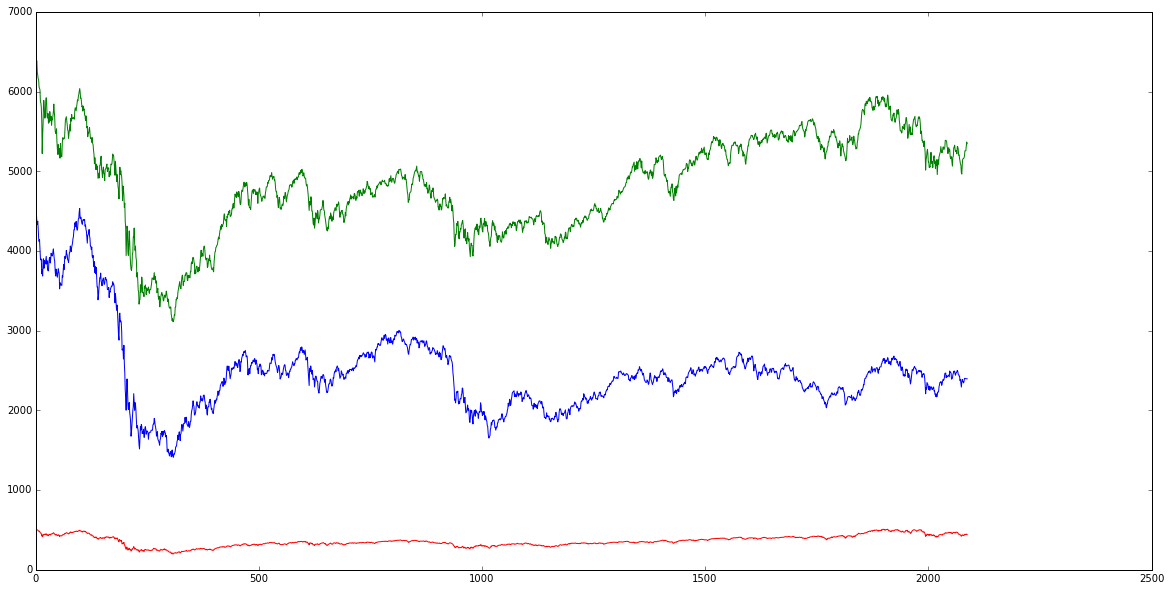

In [11]:
date_idx = range(0, len(filled_data))
plt.figure(figsize=(20,10))
drawn_colors = ['r', 'g', 'b']
# drawn_codes = ['Close_YAHOO_MSFT', 'Close_YAHOO_AAPL', 'Close_YAHOO_GOOGL']
drawn_codes = ['Close_YAHOO_INDEX_AEX', 'Close_YAHOO_INDEX_AORD', 'Close_YAHOO_INDEX_ATX']
for code, color in zip(drawn_codes, drawn_colors):
    plt.plot(date_idx, filled_data.loc[:, code], linewidth=1, c=color)

plt.show()

In [12]:
filled_data.to_csv('nasdaq_indices_processed.csv')

In [13]:
filled_transposed_data = filled_data.transpose().values
print filled_transposed_data.shape

# for t-SNE
import numpy as np
np.savetxt('nasdaq_indices_transposed.csv', filled_transposed_data, delimiter='\t', fmt='%f')
np.savetxt('nasdaq_indices_transposed_labels.csv', filled_data.transpose().index, fmt='%s')

(60, 2088)


In [ ]:
# nasdaq_north_us
python bhtsne.py -i ~/code/personal/misc/stock_crawler/nasdaq_north_us_transposed.csv -o ~/code/personal/misc/stock_crawler/nasdaq_north_us_transposed_tsne_2dims.csv -r 42 -d 2 -n 500 -p 10 -v
python bhtsne.py -i ~/code/personal/misc/stock_crawler/nasdaq_north_us_transposed.csv -o ~/code/personal/misc/stock_crawler/nasdaq_north_us_transposed_tsne_3dims.csv -r 42 -d 3 -n 500 -p 10 -v

In [ ]:
# nasdaq_indices
python bhtsne.py -i ~/code/personal/misc/stock_crawler/nasdaq_indices_transposed.csv -o ~/code/personal/misc/stock_crawler/nasdaq_indices_transposed_tsne_2dims.csv -r 42 -d 2 -n 500 -p 10 -v
python bhtsne.py -i ~/code/personal/misc/stock_crawler/nasdaq_indices_transposed.csv -o ~/code/personal/misc/stock_crawler/nasdaq_indices_transposed_tsne_3dims.csv -r 42 -d 3 -n 500 -p 10 -v